# Marketing & Retail Analytics Project

## Part A: 
#### Problem Statement:

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers. 

### Data Dictionary:
ORDERNUMBER : Order Number

CUSTOMERNAME : customer

QUANTITYORDERED : Quantity ordered

PHONE : Phone of the customer

PRICEEACH : Price of Each item

ADDRESSLINE1 : Address of customer

ORDERLINENUMBER : order line

CITY : City of customer

SALES : Sales amount

POSTALCODE : Postal Code of customer

ORDERDATE : Order Date

COUNTRY : Country customer

DAYS_SINCE_LASTORDER : Days_ Since_Lastorder

CONTACTLASTNAME : Contact person customer

STATUS : Status of order like Shipped or not

CONTACTFIRSTNAME : Contact person customer

PRODUCTLINE : Product line – CATEGORY

DEALSIZE : Size of the deal based on Quantity and Item Price

MSRP : Manufacturer's Suggested Retail Price

PRODUCTCODE : Code of Product

### ANSWER

In [1]:
#Import Libraries¶

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Command to tell Python to actually display the graphs
%matplotlib inline

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

In [3]:
# READ DATASET
df=pd.read_excel("Sales_Data.xlsx")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
# Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

we want change the "ORDERDATE" column in to date time format

In [6]:
from datetime import datetime
# Function to convert ORDERDATE from serial to datetime
def convert_orderdate(serial_date):
    return (datetime(1899, 12, 30) + pd.to_timedelta(serial_date, unit='D')).strftime('%Y-%m-%d')

# Apply the function to the ORDERDATE column
df['ORDERDATE'] = df['ORDERDATE'].apply(convert_orderdate)

# Display the first few rows to verify
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1  2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2  2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3  2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4  2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

In [7]:
df["ORDERDATE"]

0       2018-02-24
1       2018-05-07
2       2018-07-01
3       2018-08-25
4       2018-10-28
           ...    
2742    2019-12-02
2743    2020-01-31
2744    2020-03-01
2745    2020-03-28
2746    2020-05-06
Name: ORDERDATE, Length: 2747, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [9]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [13]:
# Specify the full path to the directory where you want to save the file
directory = r'C:\Users\SABIR\Downloads'

# Save dataframe to Excel in the specified directory
df.to_excel(directory + r'\Sales_Data_project_1.xlsx', index=False)

In [14]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [15]:
# Rows and Columns
df.shape

(2747, 20)

In [16]:
# Statistical Summary
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [17]:
# nulls in data set
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

no null values 

In [18]:
# duplicate in data set
df.duplicated().sum()

0

In [19]:
# Select numeric columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object')

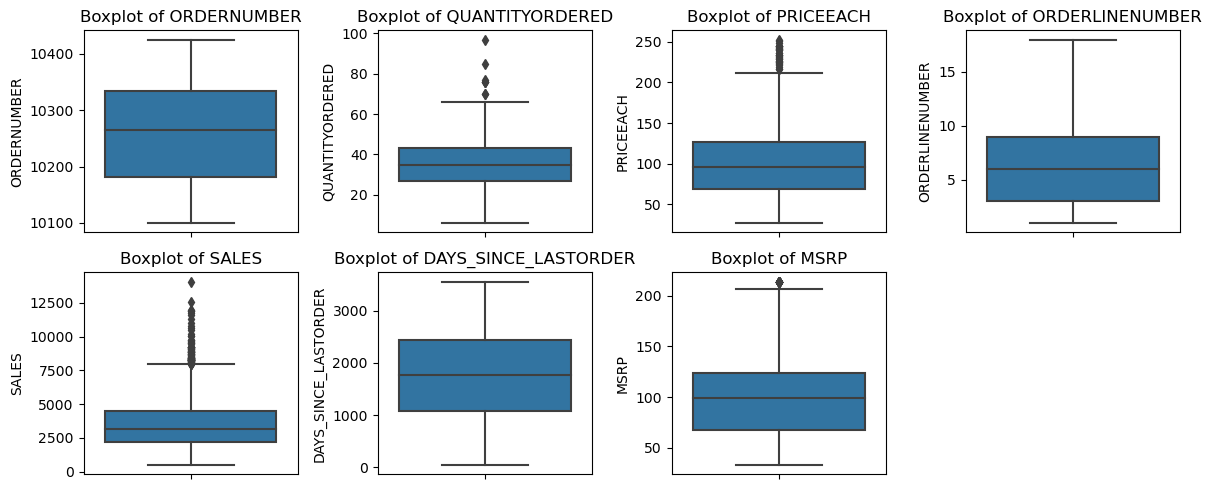

In [20]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,5))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

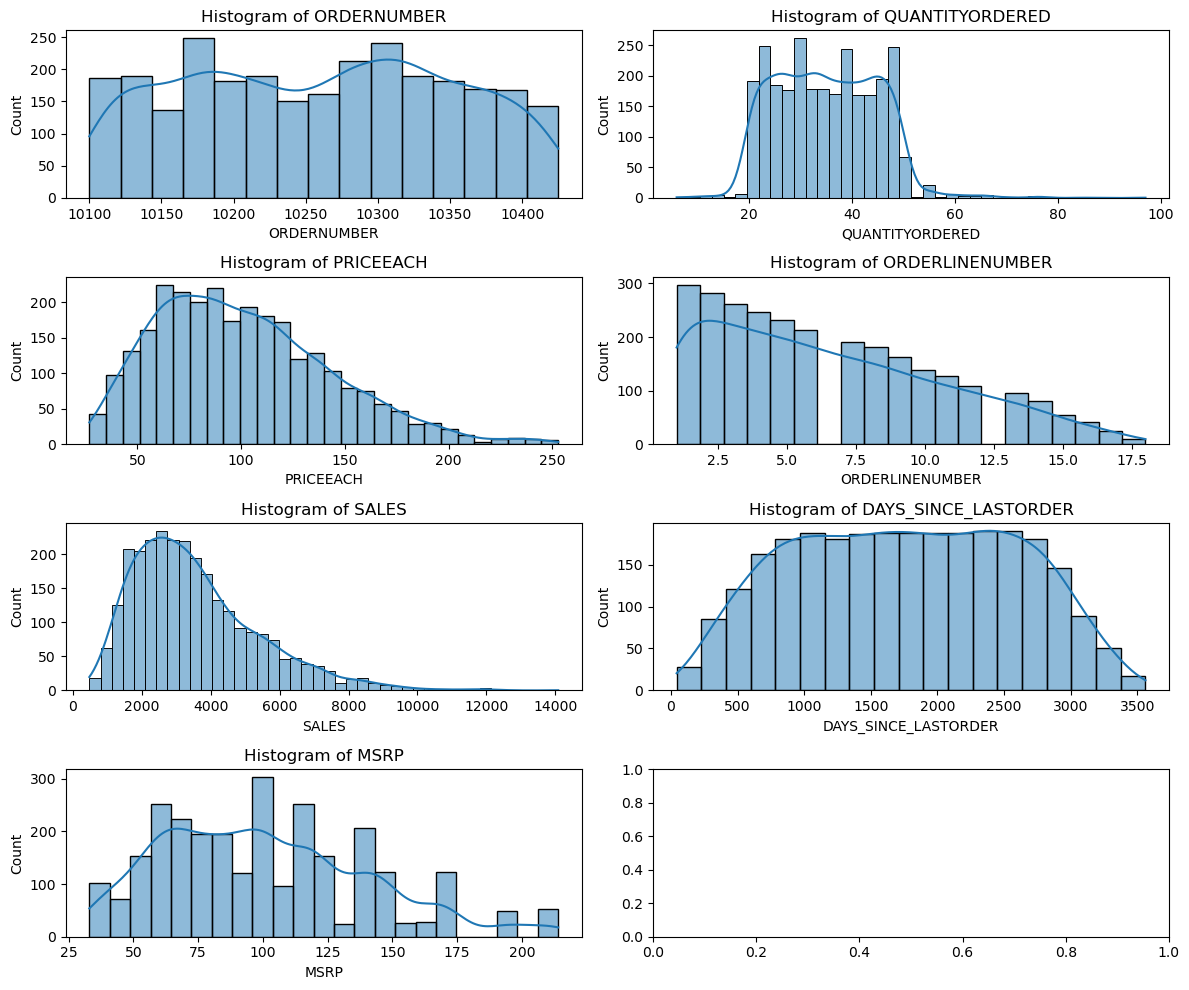

In [41]:


# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12,10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over each numeric column and create a histogram
for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col], ax=axs[i],kde=True)
    axs[i].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# OUTPUT DATA SET(SAVED FROM KNIME)
df_new=pd.read_excel("RFM_FASNA_OUTPUT_1.xlsx")

c:\Users\SABIR\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [25]:
#output data set
df_new.head()

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,MONETARY,RECENCY,FREQUENCY,MONETARY [Binned],RECENCY [Binned],FREQUENCY [Binned],MONETARY_HML,FREQUENCY_HML,RECENCY_HML
0,"AV Stores, Co.",51,34.862745,91.084510,51,157807.81,2019-10-14,51,Shipped,Classic Cars,...,51,157807.81,1654,51,Bin 3,Bin 2,Bin 3,H,H,M
1,Alpha Cognac,20,34.350000,101.160000,20,70488.44,2018-11-08,20,Shipped,Classic Cars,...,20,70488.44,1522,20,Bin 1,Bin 1,Bin 1,L,L,H
2,Amica Models & Co.,26,32.423077,110.852692,26,94117.26,2019-08-17,26,Shipped,Classic Cars,...,26,94117.26,1723,26,Bin 2,Bin 3,Bin 2,M,M,L
3,"Anna's Decorations, Ltd",46,31.934783,106.424130,46,153996.13,2020-03-09,46,Shipped,Classic Cars,...,46,153996.13,1541,46,Bin 3,Bin 2,Bin 3,H,H,M
4,Atelier graphique,7,38.571429,92.238571,7,24179.96,2019-09-27,7,Shipped,Motorcycles,...,7,24179.96,1646,7,Bin 1,Bin 2,Bin 1,L,L,M


##### Best Customers

In [ ]:
Criteria: High FREQUENCY and MONETARY scores but low RECENCY scores.

In [26]:
Best_data=df_new[(df_new.MONETARY_HML=="H")&(df_new.FREQUENCY_HML=="H")&(df_new.RECENCY_HML=="H")]

In [27]:
Best_data[["CUSTOMERNAME","MONETARY_HML","FREQUENCY_HML","RECENCY_HML"]]

,CUSTOMERNAME,MONETARY_HML,FREQUENCY_HML,RECENCY_HML
26,Danish Wholesale Imports,H,H,H
32,Euro Shopping Channel,H,H,H
41,L'ordine Souveniers,H,H,H
43,La Rochelle Gifts,H,H,H
53,Mini Gifts Distributors Ltd.,H,H,H
63,Reims Collectables,H,H,H
67,Salzburg Collectables,H,H,H
72,Souveniers And Things Co.,H,H,H
78,The Sharp Gifts Warehouse,H,H,H


#### Customers on the Verge of Churning

Criteria: High FREQUENCY and MONETARY scores but low RECENCY scores.

In [28]:
Verge_of_churning_data = df_new[
    ((df_new['MONETARY_HML'] == "H") | (df_new['MONETARY_HML'] == "M")) &
    ((df_new['FREQUENCY_HML'] == "H") | (df_new['FREQUENCY_HML'] == "M")) &
    (df_new['RECENCY_HML'] == "L")
]

In [31]:
Verge_of_churning_data[["CUSTOMERNAME","MONETARY_HML","FREQUENCY_HML","RECENCY_HML"]]

,CUSTOMERNAME,MONETARY_HML,FREQUENCY_HML,RECENCY_HML
2,Amica Models & Co.,M,M,L
21,Collectable Mini Designs Co.,M,M,L
39,Herkku Gifts,M,M,L
47,Marta's Replicas Co.,M,M,L
56,"Norway Gifts By Mail, Co.",M,M,L
65,"Royal Canadian Collectables, Ltd.",M,M,L
68,"Saveley & Henriot, Co.",H,H,L
84,"Vida Sport, Ltd",M,M,L


##### Loyal Customers

In [32]:
#Criteria: High FREQUENCY scores.

In [33]:
loyal_customers = df_new[df_new['FREQUENCY_HML'] == "H"]


In [34]:
loyal_customers[["CUSTOMERNAME","MONETARY_HML","FREQUENCY_HML","RECENCY_HML"]]

,CUSTOMERNAME,MONETARY_HML,FREQUENCY_HML,RECENCY_HML
0,"AV Stores, Co.",H,H,M
3,"Anna's Decorations, Ltd",H,H,M
6,"Australian Collectors, Co.",H,H,M
26,Danish Wholesale Imports,H,H,H
30,"Dragon Souveniers, Ltd.",H,H,M
32,Euro Shopping Channel,H,H,H
37,Handji Gifts& Co,M,H,H
41,L'ordine Souveniers,H,H,H
43,La Rochelle Gifts,H,H,H
44,Land of Toys Inc.,H,H,M


#### Lost Customers

Criteria: Low RECENCY,FREQUENCY, and MONETARY scores.

In [35]:
lost_customers = df_new[
    (df_new['RECENCY_HML'] == "L") &
    (df_new['FREQUENCY_HML'] == "L") &
    (df_new['MONETARY_HML'] == "L")
]


In [36]:
lost_customers[["CUSTOMERNAME","MONETARY_HML","FREQUENCY_HML","RECENCY_HML"]]

,CUSTOMERNAME,MONETARY_HML,FREQUENCY_HML,RECENCY_HML
8,Auto Assoc. & Cie.,L,L,L
12,"Bavarian Collectables Imports, Co.",L,L,L
15,CAF Imports,L,L,L
16,Cambridge Collectables Co.,L,L,L
20,"Clover Collections, Co.",L,L,L
25,Daedalus Designs Imports,L,L,L
29,"Double Decker Gift Stores, Ltd",L,L,L
40,"Iberia Gift Imports, Corp.",L,L,L
58,Online Mini Collectables,L,L,L
59,Osaka Souveniers Co.,L,L,L
